In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# def detect_lines(
#     img, threshold1=50, threshold2=150, apertureSize=3, minLineLength=100, maxLineGap=10
# ):
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert to grayscale
#     edges = cv2.Canny(gray, threshold1, threshold2, apertureSize)  # detect edges
#     return cv2.HoughLinesP(
#         edges,
#         1,
#         np.pi / 180,
#         125,
#         minLineLength,
#         maxLineGap,
#     )  # detect lines

In [31]:
img = cv2.imread('pool.png')

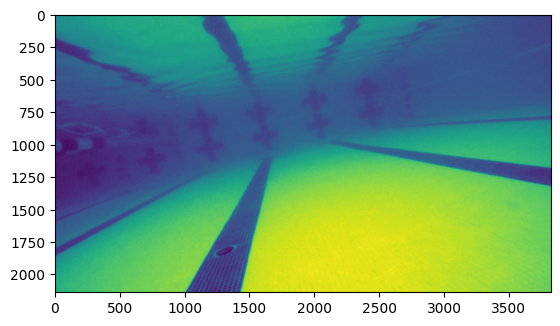

In [32]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert to grayscale
blurred_image = cv2.GaussianBlur(gray, (9, 9), 0)
plt.imshow(gray)

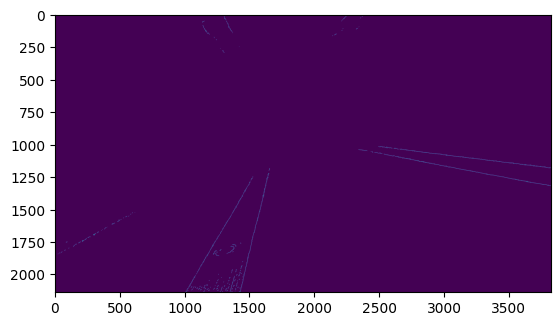

In [33]:
edges = cv2.Canny(blurred_image, 15, 25, 3)  # detect edges
plt.imshow(edges)

In [34]:
def draw_lines(img, lines, color=(0, 255, 0)):
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), color, 2)

In [35]:
# lines = detect_lines(img, 10, 20, 5)
lines = cv2.HoughLinesP(
        edges,
        rho = 1,
        theta = np.pi / 180,
        threshold = 100,
        minLineLength = 150,
        maxLineGap = 20
    )
print(lines)

[[[2635 1038 3506 1145]]

 [[2603 1091 3215 1210]]

 [[3272 1117 3553 1152]]

 [[3466 1139 3775 1177]]

 [[3362 1237 3674 1297]]

 [[2626 1097 3036 1177]]

 [[1115 1946 1222 1768]]

 [[1425 2137 1496 1829]]

 [[3136 1194 3370 1239]]

 [[2488 1018 2774 1053]]

 [[1242 1736 1379 1508]]

 [[2728 1050 2933 1075]]

 [[2572 1029 2776 1054]]

 [[1601 1398 1643 1228]]

 [[1436 2095 1487 1871]]

 [[1195 1812 1414 1447]]

 [[1558 1584 1596 1431]]

 [[1040 2081 1192 1819]]

 [[2604 1091 2791 1127]]

 [[1366 1526 1503 1289]]

 [[3528 1268 3720 1305]]]


In [36]:
# draw_lines(img, lines)
def get_lines(img, lines):
    equations = {}
    for line in lines:
        x1, y1, x2, y2 = line[0]
        slope = (y2-y1) / (x2 - x1)
        y_intercept = y2 - x2*slope
        x_intercept = -y_intercept / slope
        
        pair = (slope, x_intercept)
        to_be_popped = []
        avg_slope = pair[0]
        avg_intercept = pair[1]
        identical_counter = 1
        for pairing in equations:
            if abs(min(pairing[0], pair[0])/max(pairing[0], pair[0])) > 0.95 and abs(min(pairing[1], pair[1])/max(pairing[1], pair[1])) > 0.95:
                avg_slope+=(pairing[0])
                avg_intercept+=(pairing[1])
                identical_counter+=1
                to_be_popped.append(pairing)
        
        for removal in to_be_popped:
            equations.pop(removal)
        equations[(avg_slope / identical_counter, avg_intercept / identical_counter)] = ((x1,y1), (x2,y2))

        
        to_be_popped.clear()
    
    for eq in equations:
        x1 = equations[eq][0][0]
        y1 = equations[eq][0][1]
        x2 = equations[eq][1][0]
        y2 = equations[eq][1][1]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return equations


In [37]:

def draw_lines(img, equations):
    for line in equations:
        slope = line[0]
        x1 = equations[line][0][0]
        y1 = equations[line][0][1]
        cv2.putText(img, str(slope), (x1,y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    plt.imshow(img)
    plt.show()


{(-1.1644402421268027, -282.405426925804): ((3528, 1268), (3720, 1305))}


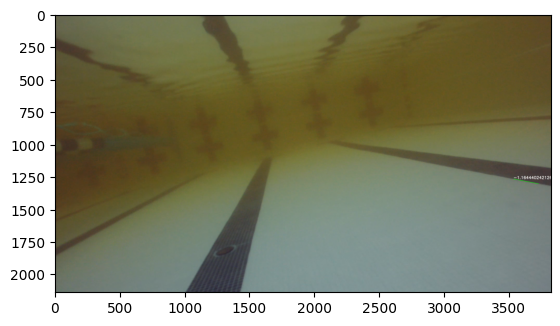

In [38]:
draw_lines(img, get_lines(img, lines))


In [39]:
def detect_lanes(img, lines):
    eqs = get_lines(img, lines)
    res = {key: eqs[key] for key in sorted(eqs.keys(), key = lambda ele: ele[1])}

    cnt = 0
    lanes = []
    line1 = None
    line2 = None

    for key in res:
        if(cnt%2==0):
            line1 = (key,res[key])
        if(cnt%2!=0):
            line2 = (key,res[key])
        if line1 != None and line2!=None:
            lanes.append([line1, line2])
            line1 = None
            line2 = None
        cnt+=1

    print(lanes)
    return lanes



In [40]:
def draw_lanes(img, lanes):
    colors = [(0,255,0), (255, 0, 0), (0, 0, 255), (128, 128, 128)]
    cnt = 0
    for lane in lanes:
        line1 = lane[0]
        line2 = lane[1]
        x1 = line1[1][0][0]
        y1 = line1[1][0][1]
        x2 = line1[1][1][0]
        y2 = line1[1][1][1]
        cv2.line(img, (x1, y1), (x2, y2), colors[cnt], 2)
        x1 = line2[1][0][0]
        y1 = line2[1][0][1]
        x2 = line2[1][1][0]
        y2 = line2[1][1][1]
        cv2.line(img, (x1, y1), (x2, y2), colors[cnt], 2)
        cnt+=1
    plt.imshow(img)


In [41]:
lanes = detect_lanes(img, lines)
# draw_lanes(img, lanes)

[]
